In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
cancer = pd.read_csv('data/wdbc.data', header=None)

In [3]:
type(cancer)

pandas.core.frame.DataFrame

In [4]:
cancer[:5]

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
y = target = cancer[1]

In [6]:
np.unique(y)

array(['B', 'M'], dtype=object)

In [7]:
y.value_counts()

B    357
M    212
Name: 1, dtype: int64

In [8]:
X = cancer.values[:, 2:].astype('float32')

In [9]:
pd.DataFrame(X)[:5]

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.990000,10.380000,122.800003,1001.000000,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.379999,17.330000,184.600006,2019.000000,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.570000,17.770000,132.899994,1326.000000,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.990000,23.410000,158.800003,1956.000000,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.690001,21.250000,130.000000,1203.000000,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.570000,25.530001,152.500000,1709.000000,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.420000,20.379999,77.580002,386.100006,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.910000,26.500000,98.870003,567.700012,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.290001,14.340000,135.100006,1297.000000,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.540001,16.670000,152.199997,1575.000000,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
X.shape

(569, 30)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
model = KNeighborsClassifier()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [14]:
y_pred = model.predict(X_test)

In [15]:
y_pred[:5]

array(['B', 'B', 'M', 'M', 'M'], dtype=object)

In [16]:
np.mean(y_pred == y_test)

0.965034965034965

In [17]:
model.score(X_test, y_test)

0.965034965034965

In [18]:
model.score(X_train, y_train)

0.94131455399061037

이웃수 설정에 따른 모델 성능 평가

In [19]:
훈련결과 = []
for 이웃수 in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=이웃수)
    model.fit(X_train, y_train)
    훈련점수 = model.score(X_train, y_train)
    시험점수 = model.score(X_test, y_test)
    훈련결과.append((훈련점수, 시험점수))

In [20]:
훈련평가 = pd.DataFrame(훈련결과, columns=['train', 'test'])
훈련평가

,train,test
0,1.000000,0.937063
1,0.938967,0.951049
2,0.948357,0.958042
3,0.941315,0.944056
4,0.941315,0.965035
5,0.936620,0.958042
6,0.934272,0.965035
7,0.931925,0.958042
8,0.929577,0.958042
9,0.931925,0.958042


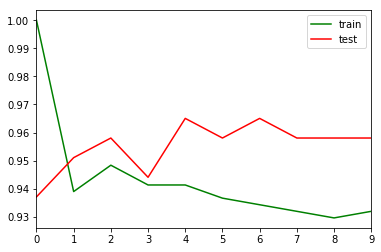

In [21]:
훈련평가.plot(style={'train': 'g', 'test': 'r'})

In [22]:
from sklearn.datasets import load_boston

In [23]:
boston = load_boston()

In [24]:
X = boston.data
y = boston.target
열제목 = boston.feature_names

In [25]:
pd.DataFrame(X, columns=열제목)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [26]:
X.shape

(506, 13)

In [27]:
y[:5]

array([ 24. ,  21.6,  34.7,  33.4,  36.2])

In [28]:
from sklearn.neighbors import KNeighborsRegressor

In [29]:
model = KNeighborsRegressor()
model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [31]:
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [32]:
y_pred = model.predict(X_test)

In [33]:
y_pred[:5]

array([ 32.84,  21.52,  13.84,  29.5 ,  25.8 ])

In [34]:
from sklearn.metrics import r2_score

In [35]:
r2_score(y_test, y_pred)

0.56081261214066214

In [36]:
model.score(X_test, y_test)

0.56081261214066214

Q: "과소적합을 벗어나려면?"

In [37]:
knn_1 = KNeighborsRegressor(n_neighbors=1)
knn_1.fit(X_train, y_train)
훈련점수 = knn_1.score(X_train, y_train)
시험점수 = knn_1.score(X_test, y_test)

훈련점수, 시험점수

(1.0, 0.37399418827425995)

In [38]:
훈련결과 = []
for 이웃수 in range(2, 6):
    model = KNeighborsRegressor(n_neighbors=이웃수)
    model.fit(X_train, y_train)
    훈련점수 = model.score(X_train, y_train)
    시험점수 = model.score(X_test, y_test)
    훈련결과.append((훈련점수, 시험점수))
    
훈련평가 = pd.DataFrame(훈련결과, columns=['train', 'test'])
훈련평가.index = range(2, 6)
훈련평가

,train,test
2,0.856537,0.554527
3,0.804098,0.537577
4,0.744669,0.587466
5,0.688246,0.560813


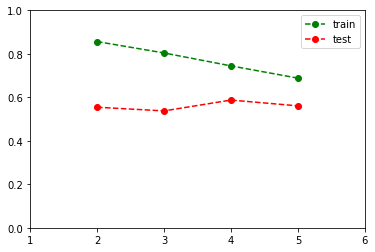

In [39]:
훈련평가.plot(ylim=(0.0, 1.0), xlim=(1, 6),
          style={'train': 'go--', 'test':'ro--'})

# 선형모델

In [40]:
x = np.linspace(0, 10, 100)

In [41]:
y = x + np.random.randn(len(x)) * 0.9

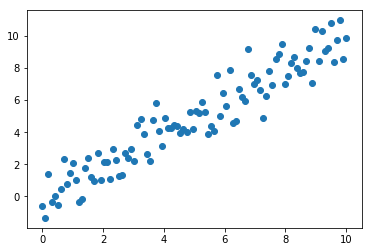

In [42]:
plt.scatter(x, y)

In [43]:
x.shape

(100,)

In [44]:
X = x.reshape(100, 1)

In [97]:
X[:5]

array([[ 0.       ],
       [ 0.1010101],
       [ 0.2020202],
       [ 0.3030303],
       [ 0.4040404]])

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
linreg = LinearRegression()

In [100]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle=False)

In [101]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

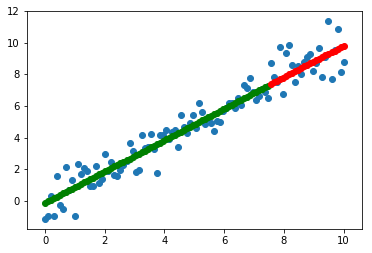

In [110]:
y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

x_tr = X_train.flatten()
x_te = X_test.flatten()

plt.scatter(x, y)
plt.scatter(x_tr, y_pred_train, color='g')
plt.scatter(x_te, y_pred_test, color='r')

In [113]:
w = linreg.coef_
b = linreg.intercept_

w, b

(array([ 0.99426122]), -0.14014991074222793)

In [115]:
boston = pd.read_csv('data/boston.csv')
boston[:5]

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [117]:
y = boston['Price']
X = boston.values[:, 1:].astype('float32')

In [118]:
X.shape

(506, 13)

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [122]:
linreg = LinearRegression().fit(X_train, y_train)

In [124]:
linreg.score(X_test, y_test)

0.74770169255334329

In [125]:
linreg.score(X_train, y_train)

0.73382948157819805

In [126]:
w = linreg.coef_
b = linreg.intercept_

In [127]:
w.shape

(13,)

In [128]:
b

35.582581

Q: 특징과 가중치의 관계 해석?

In [130]:
pd.Series(w, index=boston.columns[1:])

CRIM       -0.105759
ZN          0.054570
INDUS       0.041421
CHAS        3.221044
NOX       -18.033190
RM          3.702777
AGE         0.004706
DIS        -1.367117
RAD         0.307633
TAX        -0.011551
PTRATIO    -1.005021
B           0.011575
LSTAT      -0.497286
dtype: float32

선형모델의 성능 향상을 위해 데이터 공학을 고려할 수 있습니다.

In [131]:
from sklearn.preprocessing import PolynomialFeatures

In [132]:
다항식 = PolynomialFeatures(degree=2)

In [136]:
다항식.fit(X_train)

XX_train = 다항식.transform(X_train)
XX_test = 다항식.transform(X_test)

In [135]:
X_train.shape, XX_train.shape

((379, 13), (379, 105))

In [137]:
linreg.fit(XX_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [138]:
linreg.score(XX_test, y_test)

0.88551919327441309

In [139]:
linreg.score(XX_train, y_train)

0.91573721014691123